**Analyses of data formed by pooling together data of every day (300 in total), including enzyme production rate (manipulated via changing the consitutive and inducible enzyme producton rates)**

- **Objective**: to uncover an eqution that can replace both the MM and reverse MM and model the rate variations across time and space.

- Regresson analysis done by exporting the data genetrated and analyzing using R

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in the data
Cellulose = pd.read_csv('Cellulose_Average.csv',index_col=0)
Cellulose.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
NaN,1.472924e+06,0.000000,0.000000,30.0
1.0,1.472922e+06,0.118909,1.780127,30.0
2.0,1.472919e+06,0.227270,3.402255,30.0
3.0,1.472914e+06,0.326485,4.887281,30.0
4.0,1.472908e+06,0.417728,6.252684,30.0


In [3]:
# get rid of the NaN value
Cellulose.index = Cellulose.index.fillna(0.0)
Cellulose.shape

(6600, 4)

In [4]:
# divided by the grid size besides Enz_rate
Cellulose.iloc[:,[0,1,2]] = Cellulose.iloc[:,[0,1,2]]/10000
# divide the Enz_rate by 10e5
Cellulose.iloc[:,3] = Cellulose.iloc[:,3]/100000 
Cellulose.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate
0.0,147.292400,0.000000,0.000000,0.0003
1.0,147.292222,0.000012,0.000178,0.0003
2.0,147.291882,0.000023,0.000340,0.0003
3.0,147.291393,0.000033,0.000489,0.0003
4.0,147.290768,0.000042,0.000625,0.0003


In [5]:
Cellulose.loc[[300,600,900],'Substrate_series']

300    147.2924
600    147.2924
900    147.2924
Name: Substrate_series, dtype: float64

In [6]:
# calculate the substrate input rate and add it to the df as a new column
Subinput_rate = (147.2924/np.arange(1,301)).tolist() * 22
Cellulose['Subinput_rate'] = Subinput_rate
Cellulose.head()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate,Subinput_rate
0.0,147.292400,0.000000,0.000000,0.0003,147.292400
1.0,147.292222,0.000012,0.000178,0.0003,73.646200
2.0,147.291882,0.000023,0.000340,0.0003,49.097467
3.0,147.291393,0.000033,0.000489,0.0003,36.823100
4.0,147.290768,0.000042,0.000625,0.0003,29.458480


In [7]:
#get rid of the data of Enz_rate = 10.5e-5
Cellulose = Cellulose[Cellulose.Enz_rate != 10.5e-5]
Cellulose.shape

(6300, 5)

In [9]:
# Save dataframe to a csv file for futher analyses with R
#Cellulose.to_csv("Cellulose.csv")

### ECA model

In [9]:
Cellulose_15 = Cellulose[Cellulose.Enz_rate == 15.0e-5]
Cellulose_15.tail()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate,Subinput_rate
2095.0,0.000607,0.077154,0.000014,0.00015,0.497609
2096.0,0.000594,0.074986,0.000013,0.00015,0.495934
2097.0,0.000581,0.072874,0.000013,0.00015,0.494270
2098.0,0.000569,0.070819,0.000012,0.00015,0.492617
2099.0,0.000558,0.068819,0.000011,0.00015,0.490975


In [10]:
def ECA(Substrate,Enzyme):
    Vmax = 30.5612
    K    = 158.1958
    Rate = Substrate*Enzyme*Vmax/(K+ Substrate+Enzyme)
    
    return Rate

In [11]:
# predicted rate 
Rate_ECA1 = ECA(Cellulose_15['Substrate_series'],Cellulose_15['Enzyme_series'])

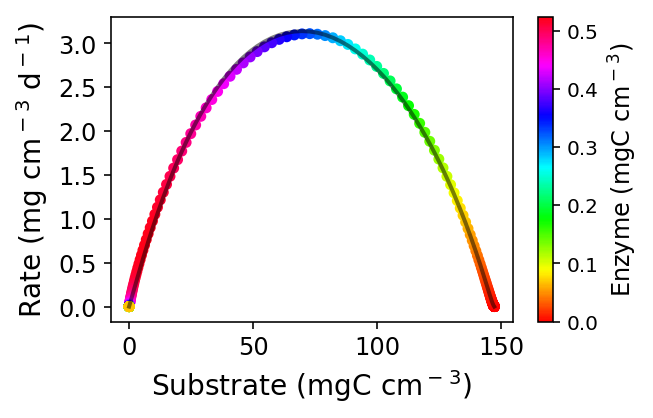

In [12]:
# rate vs. substrate

fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Cellulose_15['Substrate_series'],Cellulose_15['Decayrates_series'],s=20,
           c=Cellulose_15['Enzyme_series'],cmap='hsv',alpha=1)
ax.plot(Cellulose_15['Substrate_series'],Rate_ECA1,linewidth=2, color='black',alpha=0.5)

ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


cb = plt.colorbar(sd)

cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Substrate.pdf',bbox_inches='tight')

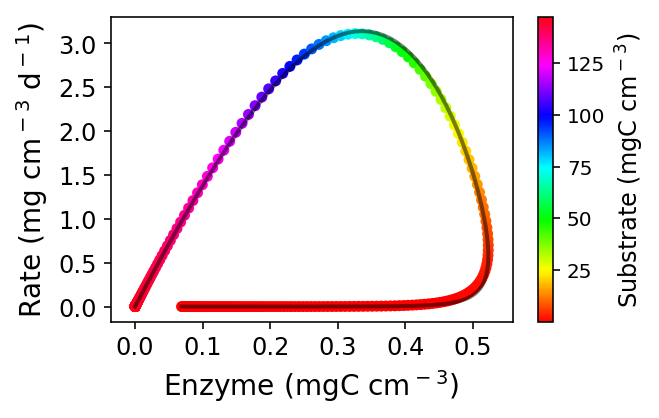

In [13]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Cellulose_15['Enzyme_series'],Cellulose_15['Decayrates_series'],s=20,
                c=Cellulose_15['Substrate_series'],cmap='hsv',alpha=1)

ax.plot(Cellulose_15['Enzyme_series'],Rate_ECA1,linewidth=2,color='black',alpha=0.5)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)

cb.set_label("Substrate (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Enzyme.pdf',bbox_inches='tight')

## Other enzyme production rates

In [14]:
index = (Cellulose.Enz_rate == 5.0e-5)|(Cellulose.Enz_rate == 10.0e-5)|(Cellulose.Enz_rate == 15.0e-5)|(Cellulose.Enz_rate == 20.0e-5)|(Cellulose.Enz_rate == 30.0e-5)
Cellulose_1 = Cellulose[index]
Cellulose_1.tail()

,Substrate_series,Enzyme_series,Decayrates_series,Enz_rate,Subinput_rate
5395.0,35.999817,0.195076,1.418508,0.00005,0.497609
5396.0,34.610721,0.196223,1.389096,0.00005,0.495934
5397.0,33.251909,0.197326,1.358813,0.00005,0.494270
5398.0,31.924034,0.198390,1.327874,0.00005,0.492617
5399.0,30.627696,0.199411,1.296338,0.00005,0.490975


In [15]:
def ECA(Substrate,Enzyme,Vmax,K):
    #Vmax = 35.0193
    #K    = 202.0175
    Rate = Substrate*Enzyme*Vmax/(K+ Substrate+Enzyme)
    
    return Rate

In [16]:
Cellulose_5 = Cellulose[Cellulose.Enz_rate == 5.0e-5]
Cellulose_10= Cellulose[Cellulose.Enz_rate == 10.0e-5]
Cellulose_15= Cellulose[Cellulose.Enz_rate == 15.0e-5]
Cellulose_20= Cellulose[Cellulose.Enz_rate == 20.0e-5]
Cellulose_30= Cellulose[Cellulose.Enz_rate == 30.0e-5]

In [17]:
# predicted rate 
Rate_ECA_5 = ECA(Cellulose_5['Substrate_series'],Cellulose_5['Enzyme_series'],22.5057,75.0404)
Rate_ECA_10 = ECA(Cellulose_10['Substrate_series'],Cellulose_10['Enzyme_series'],24.9757,102.192)
Rate_ECA_15 = ECA(Cellulose_15['Substrate_series'],Cellulose_15['Enzyme_series'],30.5612,158.196)
Rate_ECA_20 = ECA(Cellulose_20['Substrate_series'],Cellulose_20['Enzyme_series'],33.2425,189.403)
Rate_ECA_30 = ECA(Cellulose_30['Substrate_series'],Cellulose_30['Enzyme_series'],51.635,379.492)

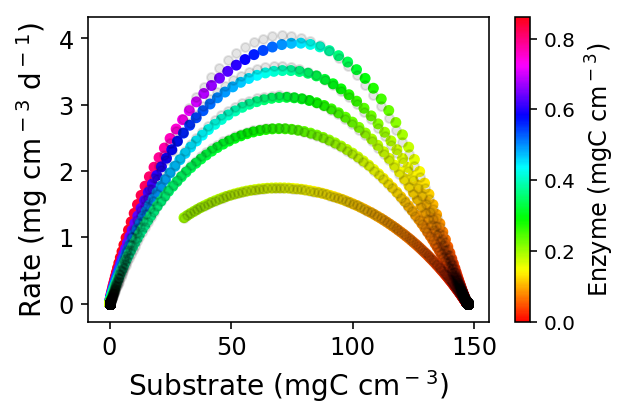

In [18]:
# rate vs. substrate

fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Cellulose_1['Substrate_series'],Cellulose_1['Decayrates_series'],s=20,
           c=Cellulose_1['Enzyme_series'],cmap='hsv',alpha=1.0)
#ax.plot(Cellulose_1['Substrate_series'],Rate_ECA1,linewidth=2, color='black',alpha=0.5)
ax.scatter(Cellulose_5['Substrate_series'],Rate_ECA_5,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_10['Substrate_series'],Rate_ECA_10,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_15['Substrate_series'],Rate_ECA_15,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_20['Substrate_series'],Rate_ECA_20,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_30['Substrate_series'],Rate_ECA_30,s=20, color='black',alpha=0.1)

ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.legend(('1','2','3','4'))

cb = plt.colorbar(sd)

cb.set_label("Enzyme (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Substrate_Sensi.pdf',bbox_inches='tight')

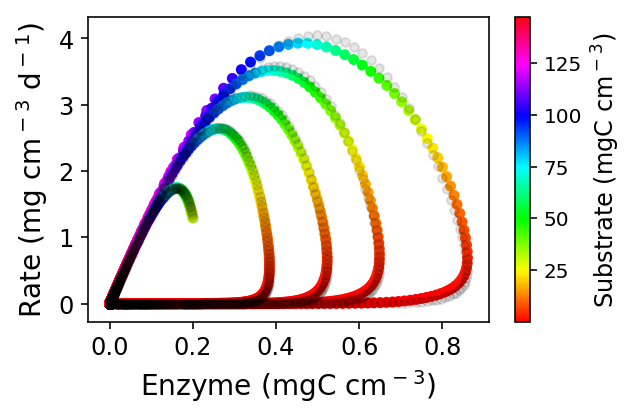

In [19]:
fig, ax = plt.subplots(figsize=(4.5,2.8))

sd = ax.scatter(Cellulose_1['Enzyme_series'],Cellulose_1['Decayrates_series'],s=20,
                c=Cellulose_1['Substrate_series'],cmap='hsv',alpha=1)

#ax.plot(Cellulose_1['Enzyme_series'],Rate_ECA1,linewidth=2,color='black',alpha=0.5)
#ax.scatter(Cellulose_1['Enzyme_series'],Rate_ECA1,s=20,color='black',alpha=0.1)

ax.scatter(Cellulose_5['Enzyme_series'],Rate_ECA_5,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_10['Enzyme_series'],Rate_ECA_10,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_15['Enzyme_series'],Rate_ECA_15,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_20['Enzyme_series'],Rate_ECA_20,s=20, color='black',alpha=0.1)
ax.scatter(Cellulose_30['Enzyme_series'],Rate_ECA_30,s=20, color='black',alpha=0.1)


ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar(sd)

cb.set_label("Substrate (mgC cm$^-$$^3$)",size=12)

#plt.savefig('ECA_Rate_Enzyme_Sensi.pdf',bbox_inches='tight')